In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1=pd.read_csv("Country_wide_covid_19_Dataset.csv")
pd.set_option("display.max_columns",None)
df1.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0
1,2020-04-18,Russia,145927292,1831892.0,36793.0,313.0,3057.0,8.0,33423.0
2,2020-04-18,Spain,46752703,930230.0,194416.0,20043.0,74797.0,7371.0,99576.0
3,2020-04-18,Brazil,212380932,62985.0,36722.0,2361.0,14026.0,6634.0,20335.0
4,2020-04-18,UK,67844241,460437.0,114217.0,15464.0,NaN,1559.0,98409.0


In [3]:
df2=pd.read_csv("covid_19_age.csv")
df2.head()

,Country,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,USA,0.189,0.657,0.154
1,Russia,0.176,0.682,0.142
2,Spain,0.147,0.659,0.194
3,Brazil,0.217,0.697,0.086
4,UK,0.177,0.638,0.185


In [4]:
print(df1.shape)
print(df2.shape)

(6603, 9)
(213, 4)


In [5]:
# Merging two dataset along with same column
df=pd.merge(df1,df2,on="Country")
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
0,2020-04-18,USA,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154
1,2020-04-19,USA,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154
2,2020-04-20,USA,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154
3,2020-04-21,USA,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154
4,2020-04-22,USA,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154


In [6]:
df.shape

(6603, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6603 entries, 0 to 6602
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      6603 non-null   object 
 1   Country                   6603 non-null   object 
 2   Population                6603 non-null   int64  
 3   Total Tests               5505 non-null   float64
 4   Total Cases               6554 non-null   float64
 5   Total Deaths              5367 non-null   float64
 6   Total Recovered           6318 non-null   float64
 7   Serious or Critical       4117 non-null   float64
 8   Active Cases              6544 non-null   float64
 9   Fraction age 0-14 years   5456 non-null   float64
 10  Fraction age 15-64 years  5456 non-null   float64
 11  Fraction age 65+ years    5456 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 670.6+ KB


In [8]:
df.isnull().sum()

Date                           0
Country                        0
Population                     0
Total Tests                 1098
Total Cases                   49
Total Deaths                1236
Total Recovered              285
Serious or Critical         2486
Active Cases                  59
Fraction age 0-14 years     1147
Fraction age 15-64 years    1147
Fraction age 65+ years      1147
dtype: int64

In [9]:
df['Total Tests'].fillna(df['Total Tests'].mean(),inplace=True)
df['Total Cases'].fillna(df['Total Cases'].mean(),inplace=True)
df['Total Deaths'].fillna(df['Total Deaths'].mean(),inplace=True)
df['Total Recovered'].fillna(df['Total Recovered'].mean(),inplace=True)
df['Serious or Critical'].fillna(df['Serious or Critical'].mean(),inplace=True)
df['Active Cases'].fillna(df['Active Cases'].mean(),inplace=True)
df['Fraction age 0-14 years'].fillna(df['Fraction age 0-14 years'].mean(),inplace=True)
df['Fraction age 15-64 years'].fillna(df['Fraction age 15-64 years'].mean(),inplace=True)
df['Fraction age 65+ years'].fillna(df['Fraction age 65+ years'].mean(),inplace=True)

In [10]:
df.isnull().sum()

Date                        0
Country                     0
Population                  0
Total Tests                 0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Serious or Critical         0
Active Cases                0
Fraction age 0-14 years     0
Fraction age 15-64 years    0
Fraction age 65+ years      0
dtype: int64

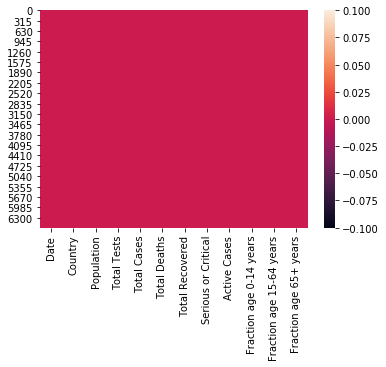

In [11]:
sns.heatmap(df.isnull())

In [12]:
df.corr()

,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years
Population,1.000000,0.223735,0.225844,0.176773,0.309361,0.170461,0.179359,-0.039630,0.071066,-0.007319
Total Tests,0.223735,1.000000,0.896328,0.803680,0.795205,0.728773,0.853809,-0.195354,0.101536,0.226321
Total Cases,0.225844,0.896328,1.000000,0.930952,0.821121,0.881620,0.975361,-0.169282,0.076412,0.208245
Total Deaths,0.176773,0.803680,0.930952,1.000000,0.794887,0.822177,0.879732,-0.172307,0.038686,0.253466
Total Recovered,0.309361,0.795205,0.821121,0.794887,1.000000,0.707686,0.687265,-0.224753,0.117072,0.260207
Serious or Critical,0.170461,0.728773,0.881620,0.822177,0.707686,1.000000,0.869204,-0.090229,0.027376,0.125269
Active Cases,0.179359,0.853809,0.975361,0.879732,0.687265,0.869204,1.000000,-0.129754,0.056774,0.161445
Fraction age 0-14 years,-0.039630,-0.195354,-0.169282,-0.172307,-0.224753,-0.090229,-0.129754,1.000000,-0.839259,-0.815133
Fraction age 15-64 years,0.071066,0.101536,0.076412,0.038686,0.117072,0.027376,0.056774,-0.839259,1.000000,0.369285
Fraction age 65+ years,-0.007319,0.226321,0.208245,0.253466,0.260207,0.125269,0.161445,-0.815133,0.369285,1.000000


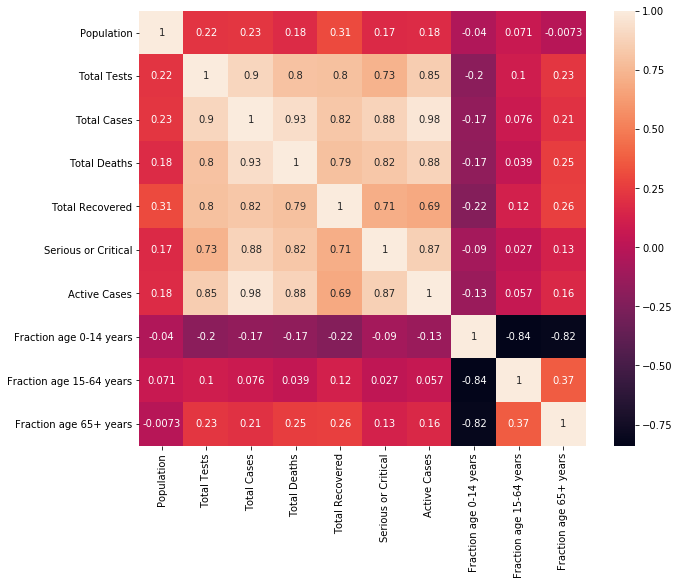

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date                        datetime64[ns]
Country                             object
Population                           int64
Total Tests                        float64
Total Cases                        float64
Total Deaths                       float64
Total Recovered                    float64
Serious or Critical                float64
Active Cases                       float64
Fraction age 0-14 years            float64
Fraction age 15-64 years           float64
Fraction age 65+ years             float64
dtype: object

In [16]:
# grouping different types of cases as per the date
datewise=df.groupby(['Date']).agg({"Total Tests":'sum',"Total Cases":"sum","Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum","Active Cases":"sum"})

In [17]:
print("basic Information")
print("Total no Of Tests around the World",datewise['Total Tests'].iloc[-1])
print("Total no Of Cases around the World",datewise['Total Cases'].iloc[-1])
print("Total no Of Deaths around the World",datewise['Total Deaths'].iloc[-1])
print("Total no Of Recovered around the World",datewise['Total Recovered'].iloc[-1])
print("Total no Of Critical cases around the World",datewise['Serious or Critical'].iloc[-1])
print("Total no Of Active Cases around the World",datewise['Active Cases'].iloc[-1])
print("Total no Of Closed Cases around the World",(datewise['Total Recovered'].iloc[-1]+datewise['Total Deaths'].iloc[-1]))


basic Information
Total no Of Tests around the World 67027056.51662123
Total no Of Cases around the World 4887403.0
Total no Of Deaths around the World 369518.823365008
Total no Of Recovered around the World 1927437.6967394743
Total no Of Critical cases around the World 78020.35899927116
Total no Of Active Cases around the World 2433308.284229829
Total no Of Closed Cases around the World 2296956.5201044823


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

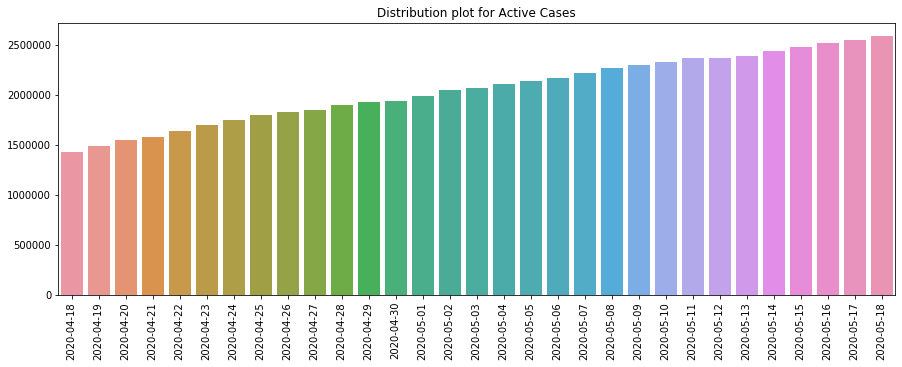

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Total Cases']-datewise['Total Recovered']-datewise['Total Deaths'])
plt.title("Distribution plot for Active Cases")
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

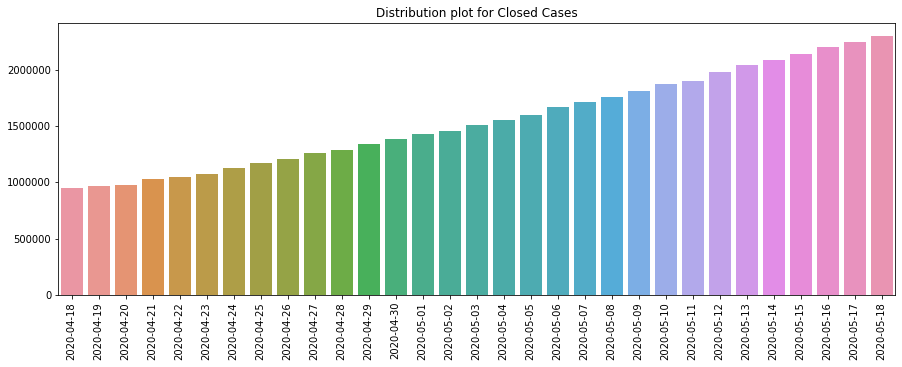

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date,y=datewise['Total Recovered']+datewise['Total Deaths'])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

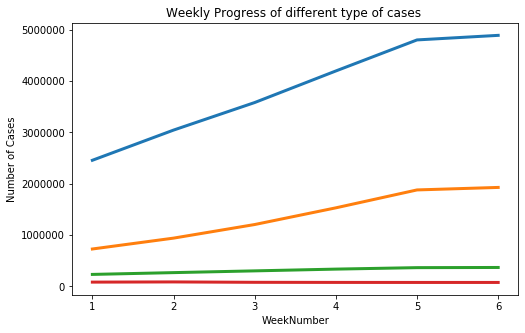

In [20]:
# week wise investigation
datewise['weekofyear']=datewise.index.weekofyear
week_num=[]
weekwise_cases=[]
weekwise_recovered=[]
weekwise_deaths=[]
weekwise_Critical=[]
w=1
for i in list(datewise['weekofyear'].unique()):
    weekwise_cases.append(datewise[datewise['weekofyear']==i]['Total Cases'].iloc[-1])
    weekwise_recovered.append(datewise[datewise['weekofyear']==i]['Total Recovered'].iloc[-1])
    weekwise_deaths.append(datewise[datewise['weekofyear']==i]['Total Deaths'].iloc[-1])
    weekwise_Critical.append(datewise[datewise['weekofyear']==i]['Serious or Critical'].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_cases,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.plot(week_num,weekwise_Critical,linewidth=3)

plt.xlabel("WeekNumber")
plt.ylabel("Number of Cases")
plt.title("Weekly Progress of different type of cases ")
plt.show()

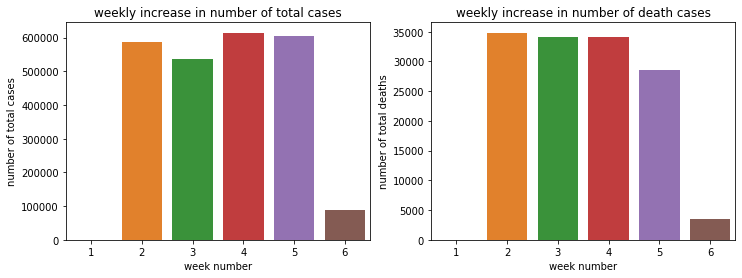

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_cases).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week number")
ax2.set_xlabel("week number")
ax1.set_ylabel("number of total cases")
ax2.set_ylabel("number of total deaths")
ax1.set_title("weekly increase in number of total cases")
ax2.set_title("weekly increase in number of death cases")
plt.show()

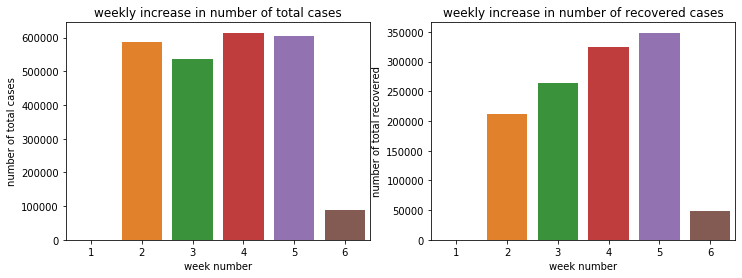

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_cases).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_recovered).diff().fillna(0),ax=ax2)
ax1.set_xlabel("week number")
ax2.set_xlabel("week number")
ax1.set_ylabel("number of total cases")
ax2.set_ylabel("number of total recovered")
ax1.set_title("weekly increase in number of total cases")
ax2.set_title("weekly increase in number of recovered cases")
plt.show()

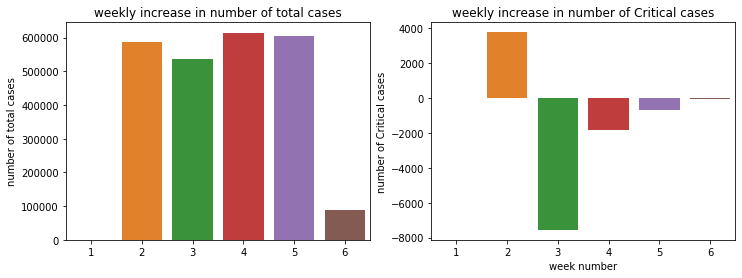

In [23]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,4))
sns.barplot(x=week_num,y=pd.Series(weekwise_cases).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_Critical).diff().fillna(0),ax=ax2)
ax2.set_xlabel("week number")
ax1.set_ylabel("number of total cases")
ax2.set_ylabel("number of Critical cases")
ax1.set_title("weekly increase in number of total cases")
ax2.set_title("weekly increase in number of Critical cases")
plt.show()

Average increase in no of Total Tests Cases everyday 1186343.0
Average increase in no of Total Cases everyday 80857.0
Average increase in no of Recovered Cases everyday 39007.0
Average increase in no of Total Death Cases everyday 4473.0
Average increase in no of Serious or Critical Cases everyday -251.0


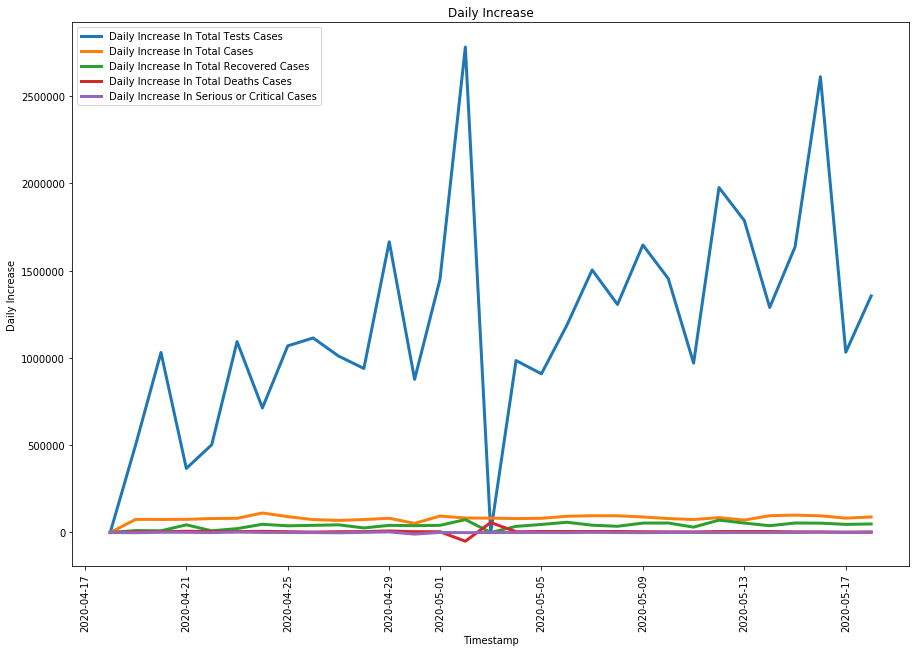

In [24]:
# Average Increasing No of confirmed Cases
print("Average increase in no of Total Tests Cases everyday",np.round(datewise["Total Tests"].diff().fillna(0).mean()))
print("Average increase in no of Total Cases everyday",np.round(datewise["Total Cases"].diff().fillna(0).mean()))
print("Average increase in no of Recovered Cases everyday",np.round(datewise["Total Recovered"].diff().fillna(0).mean()))
print("Average increase in no of Total Death Cases everyday",np.round(datewise["Total Deaths"].diff().fillna(0).mean()))
print("Average increase in no of Serious or Critical Cases everyday",np.round(datewise["Serious or Critical"].diff().fillna(0).mean()))

plt.figure(figsize=(15,10))
plt.plot(datewise['Total Tests'].diff().fillna(0),label='Daily Increase In Total Tests Cases',linewidth=3)
plt.plot(datewise['Total Cases'].diff().fillna(0),label='Daily Increase In Total Cases',linewidth=3)
plt.plot(datewise['Total Recovered'].diff().fillna(0),label='Daily Increase In Total Recovered Cases',linewidth=3)
plt.plot(datewise['Total Deaths'].diff().fillna(0),label='Daily Increase In Total Deaths Cases',linewidth=3)
plt.plot(datewise['Serious or Critical'].diff().fillna(0),label='Daily Increase In Serious or Critical Cases',linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increase")
plt.title("Daily Increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [25]:
# countrywise Analysis
countrywise=df[df['Date']==df['Date'].max()].groupby(["Country"]).agg({"Total Tests":'sum',"Total Cases":"sum","Total Deaths":"sum","Total Recovered":"sum","Serious or Critical":"sum","Active Cases":"sum"}).sort_values(['Total Cases'],ascending=False)

Text(0.5, 1.0, 'Top 15 Countries as per no of recovered Cases')

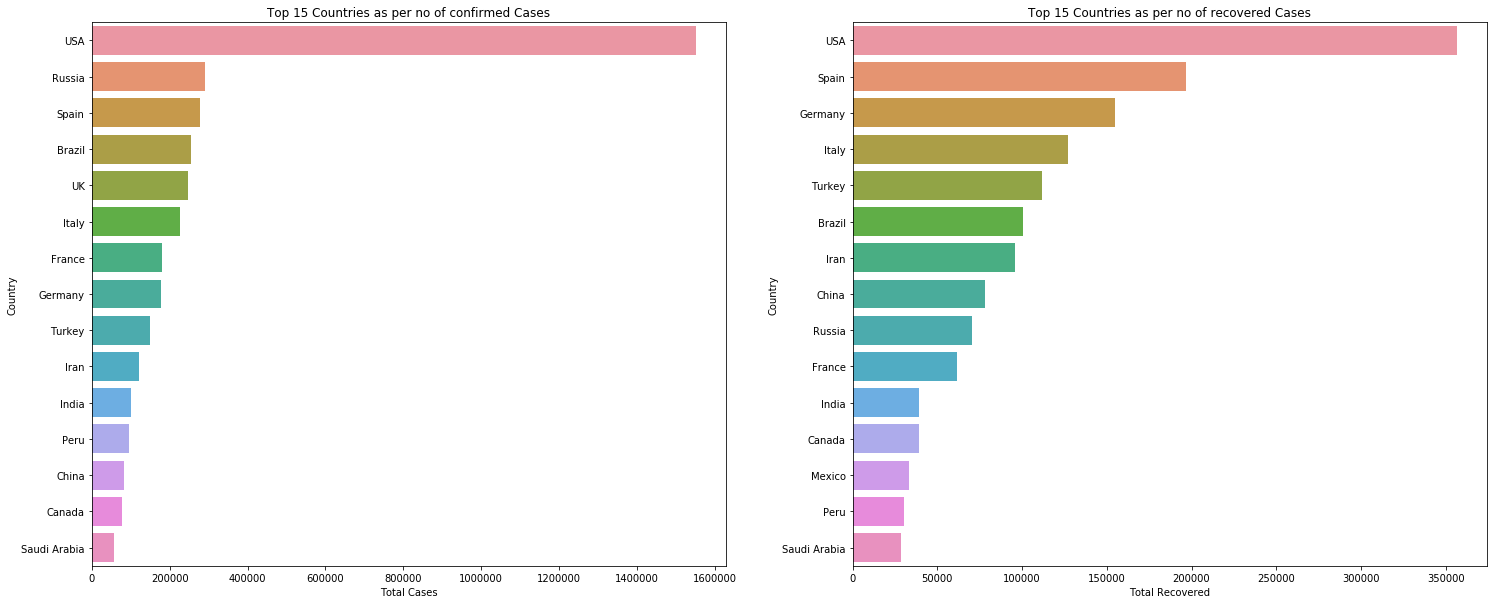

In [26]:
countrywise['Mortality']=(countrywise['Total Deaths']/countrywise['Total Recovered'])*100
countrywise['Recovery']=(countrywise['Total Recovered']/countrywise['Total Cases'])*100

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15Confirmed=countrywise.sort_values(['Total Cases'],ascending=False).head(15)
top_15Recovered=countrywise.sort_values(['Total Recovered'],ascending=False).head(15)

sns.barplot(x=top_15Confirmed['Total Cases'],y=top_15Confirmed.index,ax=ax1)
ax1.set_title("Top 15 Countries as per no of confirmed Cases")
sns.barplot(x=top_15Recovered['Total Recovered'],y=top_15Recovered.index,ax=ax2)
ax2.set_title("Top 15 Countries as per no of recovered Cases")



Text(0.5, 1.0, 'Top 15 Countries as per no of Serious or Critical Cases')

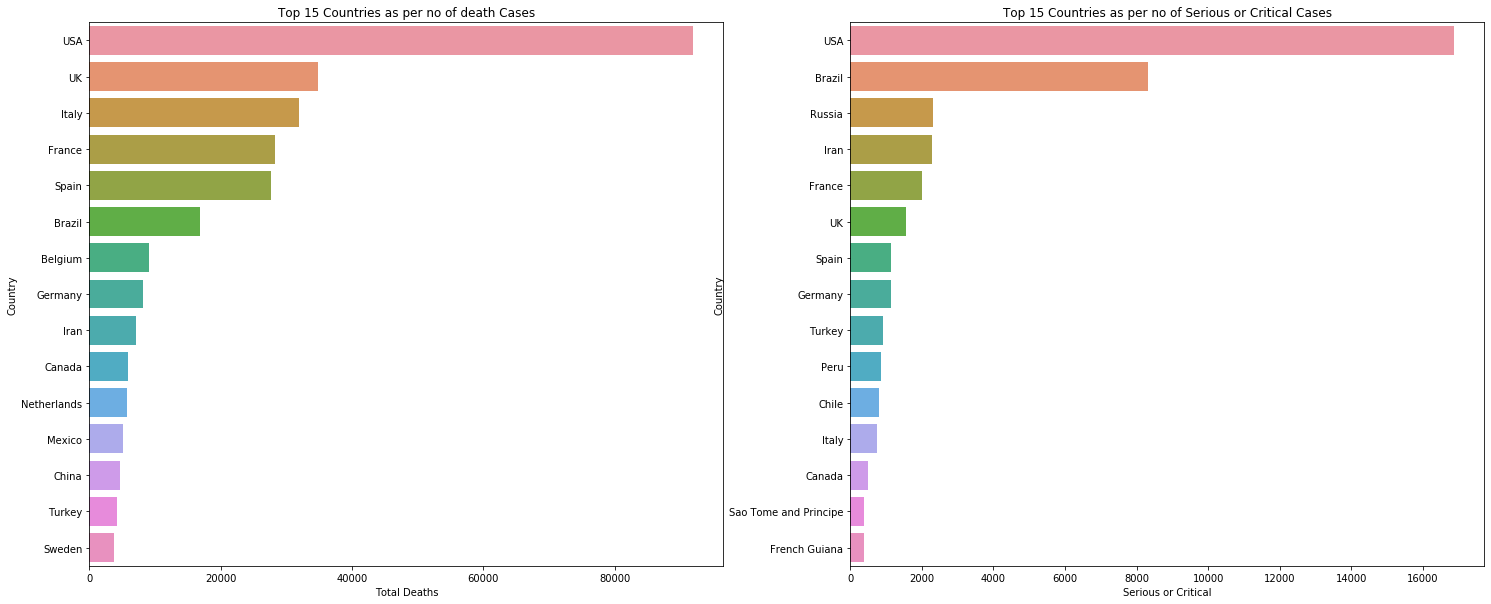

In [27]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15Deaths=countrywise.sort_values(['Total Deaths'],ascending=False).head(15)
top_15Critical=countrywise.sort_values(['Serious or Critical'],ascending=False).head(15)


sns.barplot(x=top_15Deaths['Total Deaths'],y=top_15Deaths.index,ax=ax1)
ax1.set_title("Top 15 Countries as per no of death Cases")

sns.barplot(x=top_15Critical['Serious or Critical'],y=top_15Critical.index,ax=ax2)
ax2.set_title("Top 15 Countries as per no of Serious or Critical Cases")



Text(0.5, 1.0, 'Top 15 Countries as per no of Active Cases')

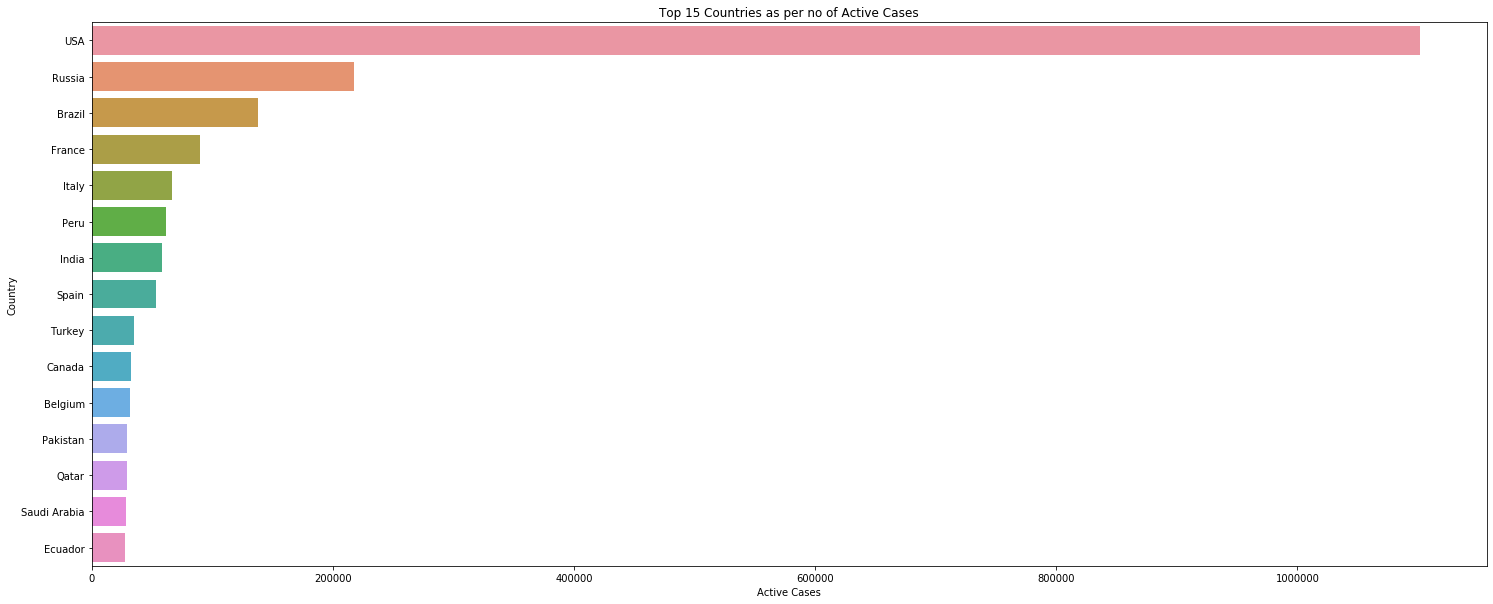

In [28]:
fig,(ax)=plt.subplots(1,figsize=(25,10))
top_15ActiveCases=countrywise.sort_values(['Active Cases'],ascending=False).head(15)
sns.barplot(x=top_15ActiveCases['Active Cases'],y=top_15ActiveCases.index,ax=ax)
ax.set_title("Top 15 Countries as per no of Active Cases")

In [29]:
dfgrouped=df.groupby(['Country','Population','Total Tests']).mean()

In [30]:
dfgrouped

Total Cases  Total Deaths  \
Country     Population Total Tests                              
Afghanistan 38817349   6422.0       1153.333333     38.333333   
                       7425.0       1463.000000     47.000000   
                       8090.0       1531.000000     50.000000   
                       8694.0       1703.000000     57.000000   
                       9000.0       1883.500000     59.000000   
...                                         ...           ...   
Zimbabwe    14836491   20537.0        36.250000      4.000000   
                       25478.0        42.000000      4.000000   
                       27059.0        44.000000      4.000000   
                       28019.0        46.000000      4.000000   
                       36081.0        37.000000      4.000000   

                                    Total Recovered  Serious or Critical  \
Country     Population Total Tests                                         
Afghanistan 38817349   6422.0            158.166667              7.00000   
                       7425.0            188.000000              7.00000   
                       8090.0            207.000000              7.00000   
                       8694.0            220.000000              7.00000   
                       9000.0            240.000000              7.00000   
...                                             ...                  ...   
Zimbabwe    14836491   20537.0             9.750000            386.74836   
                       25478.0            13.000000            386.74836   
                       27059.0            17.000000            386.74836   
                       28019.0            18.000000            386.74836   
                       36081.0            13.000000            386.74836   

                                    Active Cases  Fraction age 0-14 years  \
Country     Population Total Tests                                          
Afghanistan 38817349   6422.0         956.833333                    0.432   
                       7425.0        1228.000000                    0.432   
                       8090.0        1274.000000                    0.432   
                       8694.0        1426.000000                    0.432   
                       9000.0        1584.500000                    0.432   
...                                          ...                      ...   
Zimbabwe    14836491   20537.0         22.500000                    0.412   
                       25478.0         25.000000                    0.412   
                       27059.0         23.000000                    0.412   
                       28019.0         24.000000                    0.412   
                       36081.0         20.000000                    0.412   

                                    Fraction age 15-64 years  \
Country     Population Total Tests                             
Afghanistan 38817349   6422.0                          0.542   
                       7425.0                          0.542   
                       8090.0                          0.542   
                       8694.0                          0.542   
                       9000.0                          0.542   
...                                                      ...   
Zimbabwe    14836491   20537.0                         0.560   
                       25478.0                         0.560   
                       27059.0                         0.560   
                       28019.0                         0.560   
                       36081.0                         0.560   

                                    Fraction age 65+ years  
Country     Population Total Tests                          
Afghanistan 38817349   6422.0                        0.026  
                       7425.0                        0.026  
                       8090.0                        0.026  
                       8694.0                        0.026  


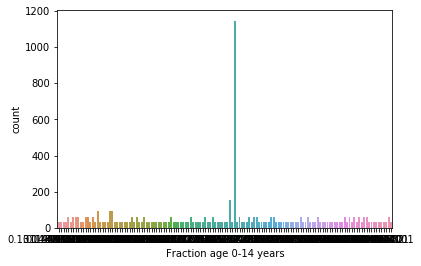

In [31]:
sns.countplot(x='Fraction age 0-14 years',data=df)

<Figure size 1080x576 with 0 Axes>

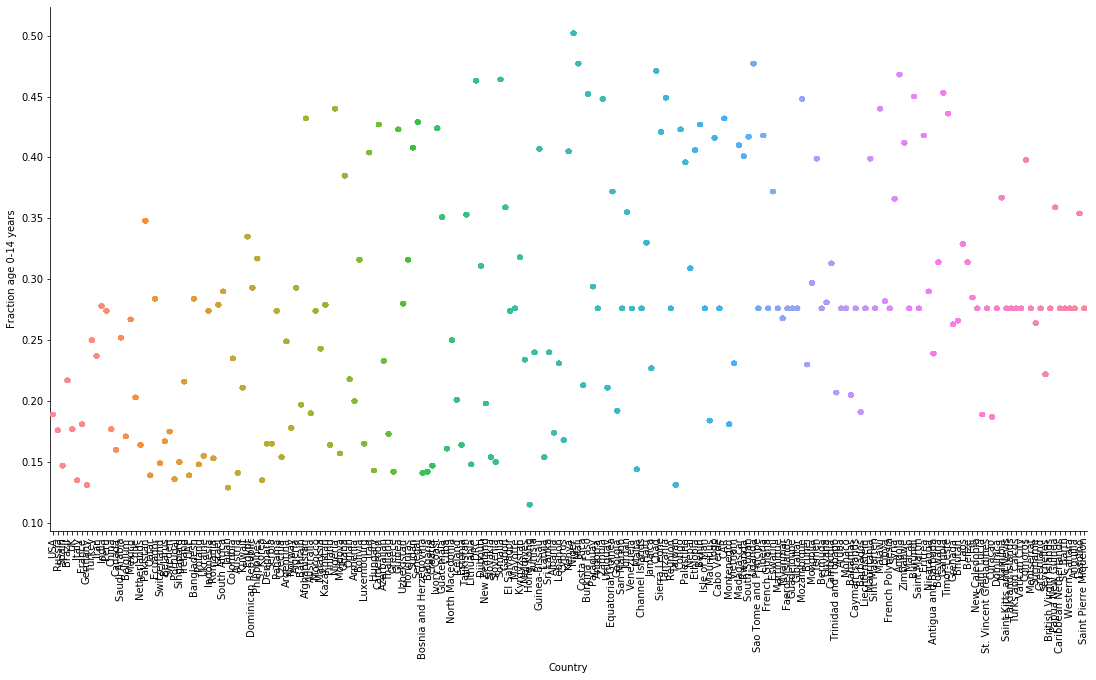

In [32]:
plt.figure(figsize=(15,8))
sns.catplot(x='Country',y="Fraction age 0-14 years",data=df,size=8,aspect=2)
plt.xticks(rotation=90)
plt.show()

In [33]:
#Converting the categorical data into numeric data using Labelencoder
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Country']=lb.fit_transform(df['Country'])

In [34]:
df['Country']

0       201
1       201
2       201
3       201
4       201
       ... 
6598    165
6599    165
6600    165
6601    165
6602    165
Name: Country, Length: 6603, dtype: int32

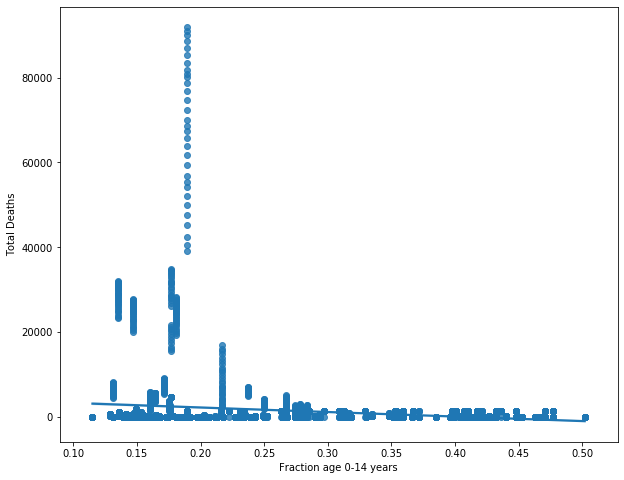

In [39]:
plt.figure(figsize=(10,8))
sns.regplot(x="Fraction age 0-14 years",y="Total Deaths",data=df)
plt.show()

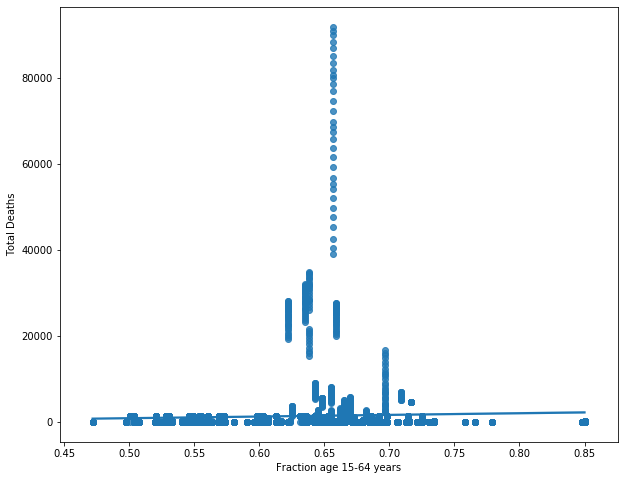

In [40]:
plt.figure(figsize=(10,8))
sns.regplot(x="Fraction age 15-64 years",y="Total Deaths",data=df)
plt.show()

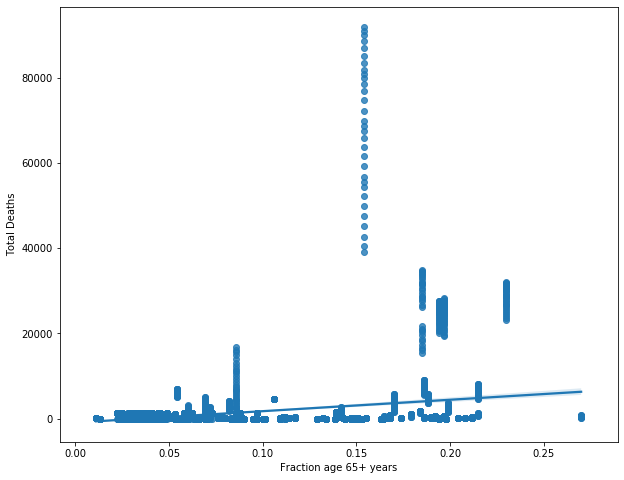

In [41]:
plt.figure(figsize=(10,8))
sns.regplot(x="Fraction age 65+ years",y="Total Deaths",data=df)
plt.show()

In [36]:
df["Day"]=pd.to_datetime(df['Date']).dt.day
df["Month"]=pd.to_datetime(df['Date']).dt.month
df["year"]=pd.to_datetime(df['Date']).dt.year
df.head()

,Date,Country,Population,Total Tests,Total Cases,Total Deaths,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Day,Month,year
0,2020-04-18,201,330774664,3722145.0,738792.0,39014.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,18,4,2020
1,2020-04-19,201,330774664,3861549.0,763832.0,40553.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,19,4,2020
2,2020-04-20,201,330774664,4026360.0,792759.0,42514.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,20,4,2020
3,2020-04-21,201,330774664,4187392.0,818744.0,45318.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,21,4,2020
4,2020-04-22,201,330774664,4325342.0,848717.0,47659.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,22,4,2020


<Figure size 720x576 with 0 Axes>

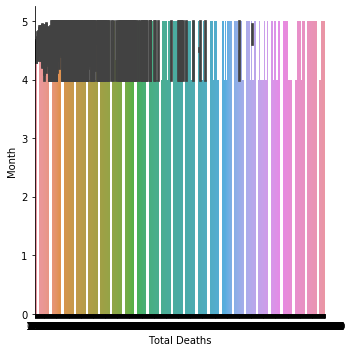

In [43]:
plt.figure(figsize=(10,8))
sns.catplot(x="Total Deaths",y="Month",kind="bar",data=df)
plt.show()

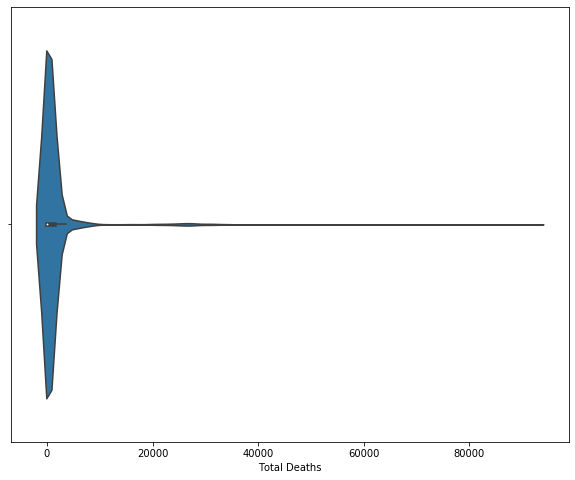

In [47]:
plt.figure(figsize=(10,8))
sns.violinplot(x="Total Deaths",data=df)
plt.show()

In [49]:
df['Deaths']=df['Total Deaths']

In [50]:
df.drop(['Total Deaths',"Date","year"],axis=1,inplace=True)

In [51]:
df.head()

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Day,Month,Deaths
0,201,330774664,3722145.0,738792.0,68269.0,13551.0,631509.0,0.189,0.657,0.154,18,4,39014.0
1,201,330774664,3861549.0,763832.0,71003.0,13566.0,652276.0,0.189,0.657,0.154,19,4,40553.0
2,201,330774664,4026360.0,792759.0,72389.0,13951.0,677856.0,0.189,0.657,0.154,20,4,42514.0
3,201,330774664,4187392.0,818744.0,82923.0,14016.0,690503.0,0.189,0.657,0.154,21,4,45318.0
4,201,330774664,4325342.0,848717.0,84050.0,14016.0,717008.0,0.189,0.657,0.154,22,4,47659.0


# Removing Outliers using zscore

In [52]:
from scipy.stats import zscore
print("print shape before zscore",df.shape)
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("print shape after zscore",df.shape)

print shape before zscore (6603, 13)
print shape after zscore (6179, 13)


# Separating the target and input variable¶

In [53]:
#Here we will consider 'Deaths' as the target variable
x=df.iloc[:,0:-1]
y=pd.DataFrame(df.iloc[:,-1])
print(x.shape)
y.shape

(6179, 12)


(6179, 1)

# Checking the skewness of the data

In [54]:
x.skew()

Country                     0.001664
Population                  4.019423
Total Tests                 3.643658
Total Cases                 5.277652
Total Recovered             6.933201
Serious or Critical         4.263773
Active Cases                6.313583
Fraction age 0-14 years     0.333146
Fraction age 15-64 years   -0.512521
Fraction age 65+ years      0.831507
Day                        -0.035010
Month                      -0.314290
dtype: float64

In [55]:
#using sqrt function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [56]:
x.skew()

Country                     0.001664
Population                  1.689288
Total Tests                 0.819468
Total Cases                 2.285296
Total Recovered             2.477523
Serious or Critical         0.407969
Active Cases                2.485499
Fraction age 0-14 years     0.333146
Fraction age 15-64 years   -0.512521
Fraction age 65+ years      0.415528
Day                        -0.035010
Month                      -0.314290
dtype: float64

In [57]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [58]:
x.skew()

Country                     0.001664
Population                 -0.785324
Total Tests                -0.612610
Total Cases                 0.089139
Total Recovered             0.181841
Serious or Critical         0.407969
Active Cases               -0.065157
Fraction age 0-14 years     0.333146
Fraction age 15-64 years   -0.512521
Fraction age 65+ years      0.415528
Day                        -0.035010
Month                      -0.314290
dtype: float64

In [59]:
x.head()

,Country,Population,Total Tests,Total Cases,Total Recovered,Serious or Critical,Active Cases,Fraction age 0-14 years,Fraction age 15-64 years,Fraction age 65+ years,Day,Month
31,158,9.399392,7.211169,5.261731,4.030519,2.828427,5.213955,0.176,0.682,0.376829,18,4
32,158,9.399392,7.239817,5.337585,4.066755,2.828427,5.293267,0.176,0.682,0.376829,19,4
33,158,9.399392,7.268182,5.384833,4.089376,26.457513,5.342403,0.176,0.682,0.376829,20,4
34,158,9.399392,7.289449,5.441127,4.146833,26.457513,5.398512,0.176,0.682,0.376829,21,4
35,158,9.399392,7.313887,5.488234,4.211877,26.457513,5.443977,0.176,0.682,0.376829,22,4


# Applying Standardscaler for scaling data

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.863958,1.543159,1.850975,1.819390,1.163838,-0.982428,1.928414,-1.119561,0.857221,1.127466,0.280064,-1.169373
1,0.863958,1.543159,1.875295,1.884217,1.196509,-0.982428,1.989532,-1.119561,0.857221,1.127466,0.397339,-1.169373
2,0.863958,1.543159,1.899375,1.924598,1.216905,1.733993,2.027396,-1.119561,0.857221,1.127466,0.514615,-1.169373
3,0.863958,1.543159,1.917430,1.972708,1.268710,1.733993,2.070633,-1.119561,0.857221,1.127466,0.631890,-1.169373
4,0.863958,1.543159,1.938176,2.012968,1.327355,1.733993,2.105669,-1.119561,0.857221,1.127466,0.749165,-1.169373


# Calculating best r_state for train_test_split

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [62]:
def maxr2_score(regr,x,y):
    max_r2_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(train_x,train_y)
        pred=regr.predict(test_x)
        r2score=r2_score(test_y,pred)
        print("The r2 score at r state", r_state, "is", r2score )
        if r2score>max_r2_score:
            max_r2_score=r2score
            final_r_state=r_state
    print("The max r2 score", max_r2_score, "is achieved at r_state", final_r_state)

In [63]:
lr=LinearRegression()
maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.3045998589637636
The r2 score at r state 43 is 0.19705126758293123
The r2 score at r state 44 is 0.22145208596470867
The r2 score at r state 45 is 0.26783682343232906
The r2 score at r state 46 is 0.26774942456566486
The r2 score at r state 47 is 0.26171101865456337
The r2 score at r state 48 is 0.22792984184875775
The r2 score at r state 49 is 0.2419566052984612
The r2 score at r state 50 is 0.24632045831373417
The r2 score at r state 51 is 0.23447009962339826
The r2 score at r state 52 is 0.27543742241824
The r2 score at r state 53 is 0.2761076075470308
The r2 score at r state 54 is 0.2496017526116262
The r2 score at r state 55 is 0.205006810015267
The r2 score at r state 56 is 0.2295862275271604
The r2 score at r state 57 is 0.22648599500386446
The r2 score at r state 58 is 0.265229731254518
The r2 score at r state 59 is 0.2724242460980857
The r2 score at r state 60 is 0.2612363811501881
The r2 score at r state 61 is 0.28074797888875047
The r2 score a

In [65]:
#Lets finalise the train and test data
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=42,test_size=0.20)
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(4943, 12)
(4943, 1)
(1236, 12)
(1236, 1)


In [66]:
#Let use Linear Regression and check max r2 score corresponding to different random states
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

The r2 score at r state 42 is 0.3045998589637636
The r2 score at r state 43 is 0.19705126758293123
The r2 score at r state 44 is 0.22145208596470867
The r2 score at r state 45 is 0.26783682343232906
The r2 score at r state 46 is 0.26774942456566486
The r2 score at r state 47 is 0.26171101865456337
The r2 score at r state 48 is 0.22792984184875775
The r2 score at r state 49 is 0.2419566052984612
The r2 score at r state 50 is 0.24632045831373417
The r2 score at r state 51 is 0.23447009962339826
The r2 score at r state 52 is 0.27543742241824
The r2 score at r state 53 is 0.2761076075470308
The r2 score at r state 54 is 0.2496017526116262
The r2 score at r state 55 is 0.205006810015267
The r2 score at r state 56 is 0.2295862275271604
The r2 score at r state 57 is 0.22648599500386446
The r2 score at r state 58 is 0.265229731254518
The r2 score at r state 59 is 0.2724242460980857
The r2 score at r state 60 is 0.2612363811501881
The r2 score at r state 61 is 0.28074797888875047
The r2 score a

In [67]:
#Importing necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [68]:
#Checking gridsearch for different algorithms
sr=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sr,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [69]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(knn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 1}

In [70]:
# checking the model and its metrics by running a set of codes.
score=[]
cv=[]
MSE=[]
RMSE=[]
MAE=[]


algorithm=[LinearRegression(),SVR(C= 10, kernel= 'rbf'),DecisionTreeRegressor(),KNeighborsRegressor(n_neighbors=1)]
for i in algorithm:
    l=i
    print(l)
    l.fit(train_x,train_y)
    pred=l.predict(test_x)
    r2score=r2_score(test_y,pred)
    print("R2 score", r2score)
    score.append(r2score)
    crossscore=cross_val_score(l,x,y,cv=5,scoring='r2').mean()
    print("The CV Score is", crossscore)
    cv.append(crossscore)
    mean_sqrd_error=mean_squared_error(test_y,pred)
    MSE.append(mean_sqrd_error)
    print("Mean Squared Error is", mean_sqrd_error )
    rootMSE=np.sqrt(mean_sqrd_error)
    RMSE.append(rootMSE)
    print("Root Mean Squared Error is: ",rootMSE)
    Meanabserror=mean_absolute_error(test_y,pred)
    MAE.append(Meanabserror)
    print("Mean Absolute Error is: ", Meanabserror)
    print("\n")

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2 score 0.3045998589637636
The CV Score is -3.658372085046777
Mean Squared Error is 883311.0024087256
Root Mean Squared Error is:  939.8462653055155
Mean Absolute Error is:  568.5979093447877


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R2 score 0.11381204892499652
The CV Score is -0.2613053626130918
Mean Squared Error is 1125653.449279077
Root Mean Squared Error is:  1060.9681660064439
Mean Absolute Error is:  435.0775268284889


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=N

In [71]:
result=pd.DataFrame({'Model':['LinearRegression','SVR','DecisionTreeRegressor','KNeighborsRegressor'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':MSE, 'Root Mean Squared Error': RMSE, 'Mean Absolute Error':MAE})
result

,Model,R2score,Cross_val_score,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error
0,LinearRegression,0.304600,-3.658372,8.833110e+05,939.846265,568.597909
1,SVR,0.113812,-0.261305,1.125653e+06,1060.968166,435.077527
2,DecisionTreeRegressor,0.985509,-1.083301,1.840694e+04,135.672191,21.781574
3,KNeighborsRegressor,0.981165,-1.460637,2.392481e+04,154.676462,24.145250


In [72]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [73]:
#Lets check max r2 score when to use
lsreg=Lasso(alpha=0.01)
r_state=maxr2_score(lsreg,x,y)

The r2 score at r state 42 is 0.3046176661873038
The r2 score at r state 43 is 0.19698970649595138
The r2 score at r state 44 is 0.2214525176377069
The r2 score at r state 45 is 0.2678411695476185
The r2 score at r state 46 is 0.26776817001836206
The r2 score at r state 47 is 0.2617051830469008
The r2 score at r state 48 is 0.22793473419150456
The r2 score at r state 49 is 0.24197052251679851
The r2 score at r state 50 is 0.24635475634319193
The r2 score at r state 51 is 0.23447409003549902
The r2 score at r state 52 is 0.27542629506179994
The r2 score at r state 53 is 0.27608880370772226
The r2 score at r state 54 is 0.24959614015178533
The r2 score at r state 55 is 0.20497283487178164
The r2 score at r state 56 is 0.2295801153457292
The r2 score at r state 57 is 0.22646191778242353
The r2 score at r state 58 is 0.2652415031560874
The r2 score at r state 59 is 0.27243313822774606
The r2 score at r state 60 is 0.2611874721542943
The r2 score at r state 61 is 0.28076649994052905
The r2 

In [74]:
#Lets use cross val score with Lasso
print("Mean r2 score for Lasso Regression:", cross_val_score(lsreg,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Lasso Regression: ", cross_val_score(lsreg,x,y,cv=5,scoring='r2').std())
#The lasso here is performing just like Linear Regression

Mean r2 score for Lasso Regression: -3.657283735569829
standard deviation in r2 score for Lasso Regression:  5.366764220611328


In [75]:
#Now we will have to use gradient boosting technique
#for getting best parameters we need to use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [76]:
#Now we will use cross val score to check the mean r2 score and standard deviation
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=500)
print("Mean r2 score for Gradient boosting Regression:", cross_val_score(gbr,x,y,cv=5,scoring='r2').mean())
print("standard deviation in r2 score for Gradient boosting Regression: ", cross_val_score(gbr,x,y,cv=5,scoring='r2').std())

Mean r2 score for Gradient boosting Regression: -0.11045276236018356
standard deviation in r2 score for Gradient boosting Regression:  0.14814510874613057


In [77]:
# Lets check the maximum r2 score corresponding to this
r_state=maxr2_score(gbr,x,y)

The r2 score at r state 42 is 0.8927561800995788
The r2 score at r state 43 is 0.812716346261176
The r2 score at r state 44 is 0.8767105456793511
The r2 score at r state 45 is 0.8898817325267706
The r2 score at r state 46 is 0.8662350817902379
The r2 score at r state 47 is 0.9002529968579663
The r2 score at r state 48 is 0.8355528577927043
The r2 score at r state 49 is 0.9027083815086594
The r2 score at r state 50 is 0.8839502932963288
The r2 score at r state 51 is 0.8698082655982241
The r2 score at r state 52 is 0.8405350577498768
The r2 score at r state 53 is 0.89207551225897
The r2 score at r state 54 is 0.8896159446667431
The r2 score at r state 55 is 0.8202270048576863
The r2 score at r state 56 is 0.8869400045056715
The r2 score at r state 57 is 0.8660075995966229
The r2 score at r state 58 is 0.8572372966550976
The r2 score at r state 59 is 0.9098658902300305
The r2 score at r state 60 is 0.8454924089978629
The r2 score at r state 61 is 0.852134083454285
The r2 score at r state 

In [78]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
r_state=maxr2_score(rf,x,y)

The r2 score at r state 42 is 0.9940392728540289
The r2 score at r state 43 is 0.9807403866287105
The r2 score at r state 44 is 0.9906696520849262
The r2 score at r state 45 is 0.9894531986436722
The r2 score at r state 46 is 0.985970056412542
The r2 score at r state 47 is 0.9875567755362771
The r2 score at r state 48 is 0.9806361112652412
The r2 score at r state 49 is 0.9906673261197823
The r2 score at r state 50 is 0.9898389327227507
The r2 score at r state 51 is 0.9728497995452335
The r2 score at r state 52 is 0.9793085301318886
The r2 score at r state 53 is 0.9856783131615517
The r2 score at r state 54 is 0.987288842617003
The r2 score at r state 55 is 0.9839089566637923
The r2 score at r state 56 is 0.9842946774341869
The r2 score at r state 57 is 0.9822848777461851
The r2 score at r state 58 is 0.9422560395082908
The r2 score at r state 59 is 0.993392233956319
The r2 score at r state 60 is 0.989328277156213
The r2 score at r state 61 is 0.9880720641865425
The r2 score at r state 

In [79]:
# After trying all above models RandomForestRegressor show best accuracy among all.. So lets finalize this model
rf=RandomForestRegressor(n_estimators=200,random_state=42)

In [80]:
rf.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [81]:
rf.score(train_x,train_y)

0.9974979994028049

In [82]:
rf.score(test_x,test_y)

0.9932690991545151

In [83]:
pred=rf.predict(test_x)

In [84]:
pred

array([5.42488234e+01, 5.46835000e+02, 4.68600000e+01, ...,
       1.41625210e+03, 1.00000000e+00, 1.03390000e+02])

In [85]:
print("RMSE is :",np.sqrt(mean_squared_error(test_y,pred)))
print("r2 score is :",r2_score(test_y,pred))

RMSE is : 92.46471368809027
r2 score is : 0.9932690991545151


In [87]:
# Saving The Model
from sklearn.externals import joblib
joblib.dump(rf,"rf_Country_Wide_Covid_19.pkl")

['rf_Country_Wide_Covid_19.pkl']